<h1 style=" text-align:center; color:Blue; font-size:40px;"> <u><b>Heart Attack Prediction With 91.8% Accuracy</b></u> </h1>

<p style="text-align:center; ">
<img src="https://www.cardio.com/hs-fs/hubfs/human%20heart%20illustration.jpeg?width=900&name=human%20heart%20illustration.jpeg" style='width: 400px;'>
</p>



# **<p style="color:Blue;">About The Dataset :</p>**
    
age: Age of the patient

sex: Sex of the patient

cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False

restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable



In [3]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 5.9 MB/s eta 0:00:22
   ---------------------------------------- 0.5/124.9 MB 5.6 MB/s eta 0:00:23
   ---------------------------------------- 0.8/124.9 MB 6.1 MB/s eta 0:00:21
   ---------------------------------------- 1.1/124.9 MB 6.1 MB/s eta 0:00:21
   ---------------------------------------- 1.4/124.9 MB 5.9 MB/s eta 0:00:22
    --------------------------------------- 1.7/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.1/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.4/124.9 MB 6.0 MB/s eta 0:00:21
    --------------------------------------- 2.8/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 3.1/124.9 MB 6.1 MB/s eta 0:00:21
   - -------------------------------------- 3.4/124.9 MB 6.1 MB/s eta 0:00:21
   - -------------------------------------- 3.7/124.9 MB 6.0 MB/s eta 

### Data Import ###

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


***Reading The Dataset***

In [5]:
heart=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
heart.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv'

***Checking the shape of DataFrame***

In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

***Checking for null values***

In [4]:
heart.isnull().sum()/len(heart)*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

**No null values found**

***Checking For datatypes of the attributes***

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**All attributes are of type 'int' except 'oldpeak'**

***Checking for duplicate rows***

In [6]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


***Removing the duplicates***

In [7]:
heart.drop_duplicates(keep='first',inplace=True)

**Checking new shape**

In [8]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 302 and number of columns are  14


***Checking statistical data***

In [9]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***Computing the correlation matrix***

In [8]:
heart.corr()
# 상관 계수가 높게 나오면 학습에 영향을 줘서 포기를 해야함

NameError: name 'heart' is not defined

# ***Data Visualization***

***Breakdown of gender***

Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


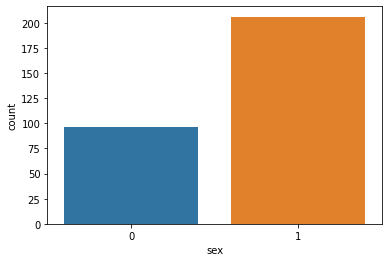

In [11]:
x=(heart.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=heart, x="sex")
plt.show()

**People having gender as 0 are more than twice the people having gender as 1**

***Breakdown for chest pain***

In [6]:
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

NameError: name 'heart' is not defined

In [ ]:
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
2. It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
3. It can also be observed people with chest pain of type 0 is almost 50% of all the people.

***Breakdown of FBS***

In [ ]:
x=(heart.fbs.value_counts())
print(x)
p = sns.countplot(data=heart, x="fbs")
plt.show()



> FBS with value 0 is significantly higher than value 1.

***Breakdown of ECG***

In [ ]:
x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()



ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.

***Breakdown for Exercise Induced Angina***

In [ ]:
x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()


***EXNG count is more than double for type 0***

***Breakdown for Thalium Stress Test***

In [ ]:
x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()


***Thall count is max for type 2 and min for type 0.***

***Density distribution for Age***

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()

**Density distribution is highest for age group 55 to 60**


In [ ]:
plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

***Trtbs has the highest count around 130***

***Heart Attack Vs Age***

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()



In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()


In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()


***Pair Plot***

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(heart)
plt.show()

***Violin Plot***

In [ ]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = heart)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = heart)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = heart)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = heart)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = heart)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = heart)

plt.show()

# **Data preprocessing**
# 데이터 전처리

**There's no need for categorical encoding**

In [ ]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y
# x 값에 전체 데이터 넣고 y 값에 결과 넣기 (데이터 분리)

**Splitting the dataset into training and testing data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)
# 나눈 데이터 훈련 및 학습

In [ ]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 스케일링 하기

In [ ]:
x_train,x_test

**1. Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

# 로지스틱 회귀

**2.Gaussian Naive Bayes**

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
# 나이브 베이즈 통계 (정규 분포)

**3.Bernoulli Naive Bayes**

In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
# 나이브 베이즈 통계 (이진 통계)

* True Positive + True Negative : 54
* False Positive + False Negative : 7

**4.Support Vector Machine**

In [ ]:
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

# 서포트 벡터 머신(개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌)

**5.Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

# 랜덤 포레스트 (회귀)

**6.K Nearest Neighbours**

In [ ]:
  
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

# KNN (최소 근접) 분류

**Optimizing the KNN**

In [ ]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# 최적화

With k=7 as it hovers after that

In [ ]:
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

# 7이 가장 최적이여보인당..^^

**7.X Gradient Boosting**

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")

# XGBoost 분류

 # **Conclusion**

1. Most of the models are performing really well.
2. SVM is performing the best for the given dataset.